In this tutorial, we will be visualizing InceptionV1, also known as GoogLeNet.

While we will focus on a few neurons, you may wish to experiment with visualizing others. If you'd like, you can try any of the following layers: `conv2d0, maxpool0, conv2d1, conv2d2, maxpool1, mixed3a, mixed3b, maxpool4, mixed4a, mixed4b, mixed4c, mixed4d, mixed4e, maxpool10, mixed5a, mixed5b`.

You can learn more about GoogLeNet in the [paper](https://www.cs.unc.edu/~wliu/papers/GoogLeNet.pdf). You can also find visualizations of all neurons in mixed3a-mixed5b [here](https://distill.pub/2017/feature-visualization/appendix/).

In [1]:
# Imports
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
# import tensorflow as tf
# assert tf.__version__.startswith('1')
import tensorflow.compat.v1 as tf

# Let's import a model from the Lucid modelzoo!

import lucid.modelzoo.vision_models as models
from lucid.misc.io import show,save
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

model = models.InceptionV1()
model.load_graphdef()

Model                         Dataset
Model                     Dataset



1 -41.409504



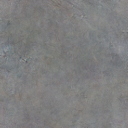

2 -13.456297



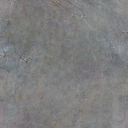

4 9.510826



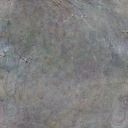

8 88.0935



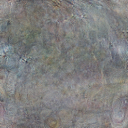

16 301.0626



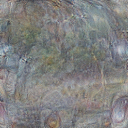

32 426.49295



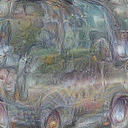

64 1202.4805



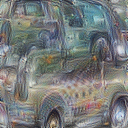

128 1071.7961



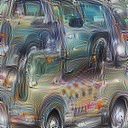

256 1586.3392



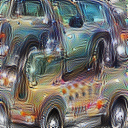

512 1579.1351



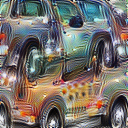

1024 1883.7959



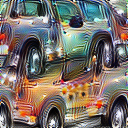

2048 1623.8331



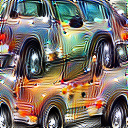

In [13]:
# Visualizing a neuron is easy!

_ = render.render_vis(model, "mixed4c_pre_relu:447",verbose=True,thresholds=(1,2,4,8,16,32,64,128,256,512,1024,2048))

**Experimenting with objectives**

512 538.2196



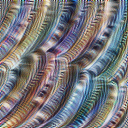

In [25]:
# Let's visualize another neuron using a more explicit objective:

obj = objectives.channel("mixed3b_pre_relu", 342)
# print(obj)
_ = render.render_vis(model, obj)

1 [-64.55127]



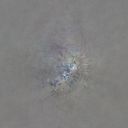

2 [21.956396]



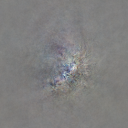

4 [245.04175]



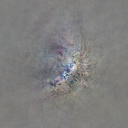

8 [523.01263]



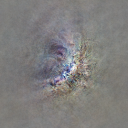

16 [940.61725]



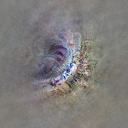

32 [1067.5847]



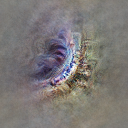

64 [1530.1765]



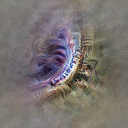

128 [1474.7638]



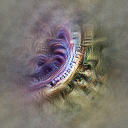

256 [1849.5763]



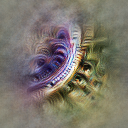

512 [1855.3998]



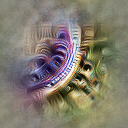

1024 [1833.2621]



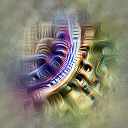

2048 [1750.9335]



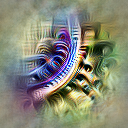

3000 [1626.229]



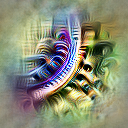

4000 [1656.5798]



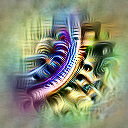

5000 [1875.6747]



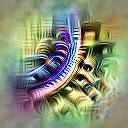

6000 [1773.4299]



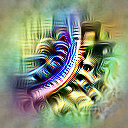

7000 [1769.7535]



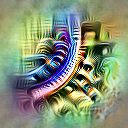

8000 [1514.9874]



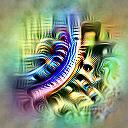

9000 [1989.4468]



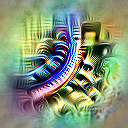

10000 [1810.8483]



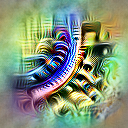

20000 [1815.2958]



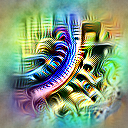

30000 [1648.7734]



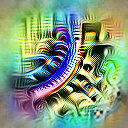

40000 [1883.7223]



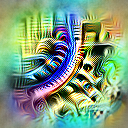

50000 [1777.7603]



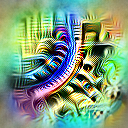

100000 [2098.5989]



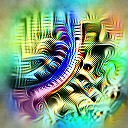

In [3]:
obj = objectives.neuron("mixed3b_pre_relu", 342)
# print(obj)
_ = render.render_vis(model, obj,verbose=True,thresholds=(1,2,4,8,16,32,64,128,256,512,1024,2048,3000,4000,5000,6000,7000,8000,9000,10000,20000,30000,40000,50000,100000))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



1 -75.16681




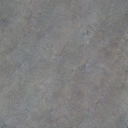

2 41.243958



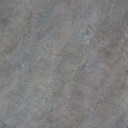

4 139.11537



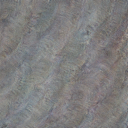

8 155.84834



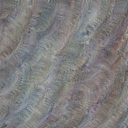

16 288.93524



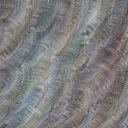

32 305.27155



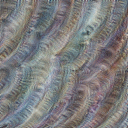

64 441.97955



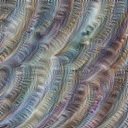

128 564.2858



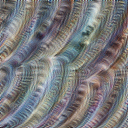

256 524.6188



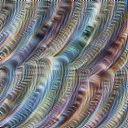

512 578.20435



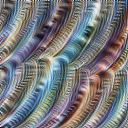

1024 686.74023



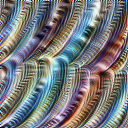

2048 598.76904



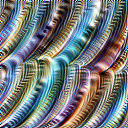

3000 707.2953



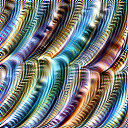

4000 569.54175



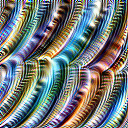

5000 655.98584



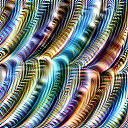

6000 644.6907



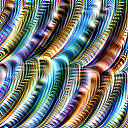

7000 510.46387



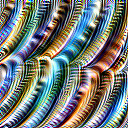

8000 472.86893



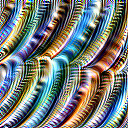

9000 506.32468



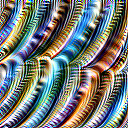

10000 602.0332



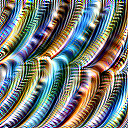

In [2]:
# Visualizing a neuron is easy!

_ = render.render_vis(model, "mixed3b_pre_relu:342",verbose=True,thresholds=(1,2,4,8,16,32,64,128,256,512,1024,2048,3000,4000,5000,6000,7000,8000,9000,10000))

512 [1671.0277]



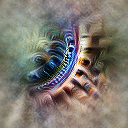

In [32]:
obj = objectives.neuron("mixed3b", 342)
# print(obj)
_ = render.render_vis(model, obj)

512 3438.5198



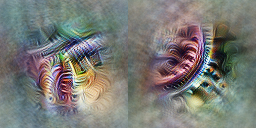

In [27]:
obj = objectives.neuron("mixed3b_pre_relu", 342, batch=1) - objectives.neuron("mixed3b_pre_relu", 342, batch=0)
_ = render.render_vis(model, obj, param_f)

512 126597.43



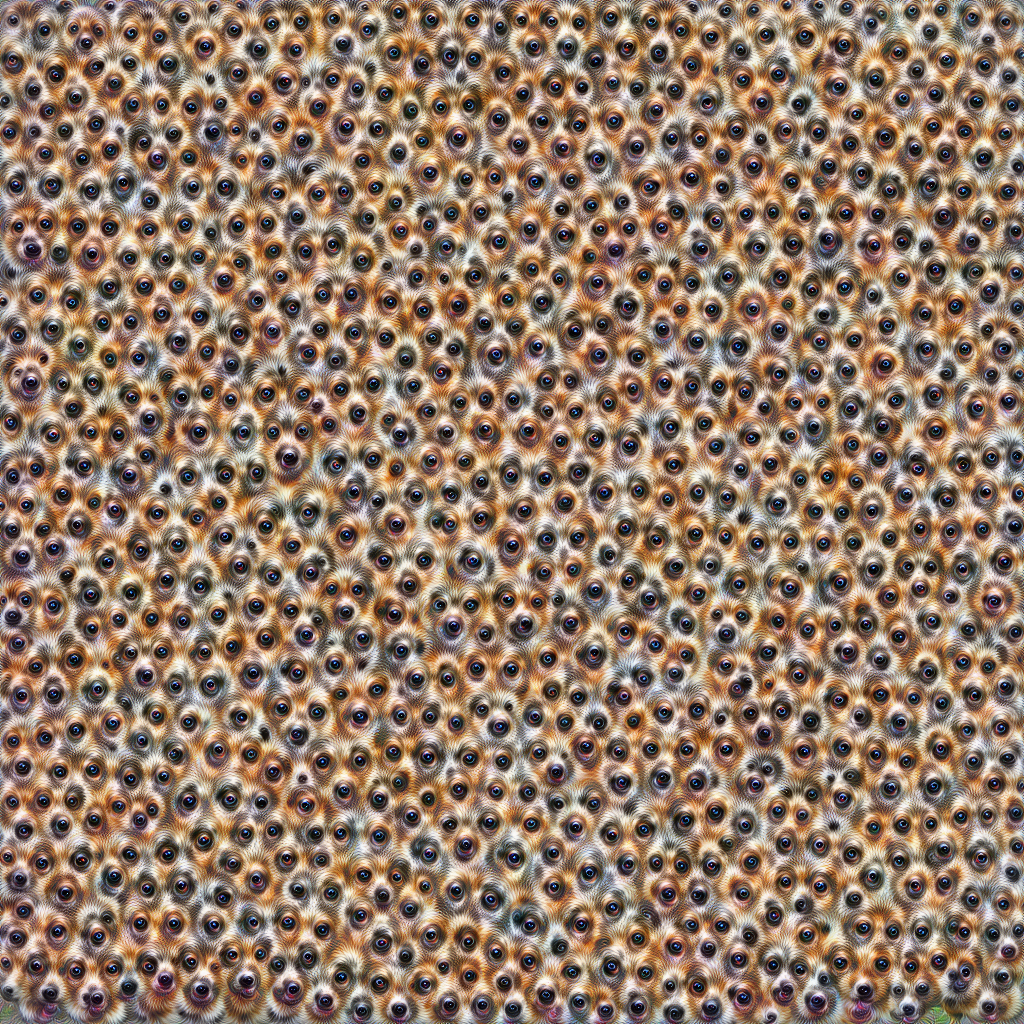

In [4]:
obj = objectives.deepdream("mixed4a")
_ = render.render_vis(model, obj)

512 155535.69



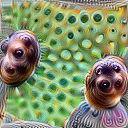

In [33]:
obj = objectives.deepdream("mixed4a_pre_relu")
_ = render.render_vis(model, obj)

512 15987.392



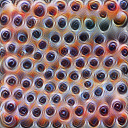

In [30]:
obj = objectives.deepdream("mixed3b")
_ = render.render_vis(model, obj)

512 2645.834



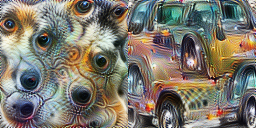

In [16]:

param_f = lambda: param.image(128, batch=2)
obj = objectives.channel("mixed4c_pre_relu", 447, batch=1) - objectives.channel("mixed4c_pre_relu", 447, batch=0)
_ = render.render_vis(model, obj, param_f)

512 646.14307



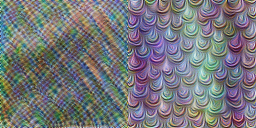

512 467.07608



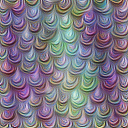

In [22]:
param_f = lambda: param.image(128, batch=2)
obj = objectives.channel("mixed3a_pre_relu", 175, batch=1) - objectives.channel("mixed3a_pre_relu", 175, batch=0)
_ = render.render_vis(model, obj, param_f)
_ = render.render_vis(model,"mixed3a_pre_relu:175" )

512 1572.6458



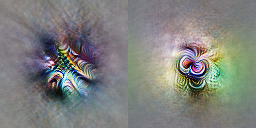

In [24]:
obj = objectives.neuron("mixed3a_pre_relu", 175, batch=1) - objectives.neuron("mixed3a_pre_relu", 175, batch=0)
_ = render.render_vis(model, obj, param_f)

512 2205.3105



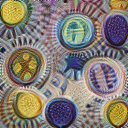

In [17]:
# Or we could do something weirder:
# (Technically, objectives are a class that implements addition.)

channel = lambda n: objectives.channel("mixed4a_pre_relu", n)
obj = channel(476) + channel(465)
_ = render.render_vis(model, obj)

**Transformation Robustness**

Recomended reading: The Feature Visualization article's section titled [The Enemy of Feature Visualization](https://distill.pub/2017/feature-visualization/#enemy-of-feature-vis) discusion of "Transformation Robustness." In particular, there's an interactive diagram that allows you to easily explore how different kinds of transformation robustness effects visualizations.

512 1273.3744



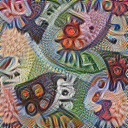

In [19]:
# No transformation robustness

transforms = []
_ = render.render_vis(model, "mixed4a_pre_relu:476",)

In [20]:
# Jitter 2

transforms = [
    transform.jitter(2)
]
_ = render.render_vis(model, "mixed4a_pre_relu:476", transforms=transforms)

ValueError: Negative dimension size caused by subtracting 7 from 4 for 'import/avgpool0' (op: 'AvgPool') with input shapes: [1,4,4,1024].

In [ ]:
# Breaking out all the stops

transforms = [
    transform.pad(16),
    transform.jitter(8),
    transform.random_scale([n/100. for n in range(80, 120)]),
    transform.random_rotate(range(-10,10) + range(-5,5) + 10*range(-2,2)),
    transform.jitter(2)
]
_ = render.render_vis(model, "mixed4a_pre_relu:476", transforms=transforms)

**Experimenting with parameterization**

Recomended reading: The Feature Visualization article's section on [Preconditioning and Parameterization](https://distill.pub/2017/feature-visualization/#preconditioning)

In [ ]:
# Using alternate parameterizations is one of the primary ingredients for
# effective visualization

param_f = lambda: param.image(128, fft=False, decorrelate=False)
_ = render.render_vis(model, "mixed4a_pre_relu:2", param_f)

In [ ]:
# Using alternate parameterizations is one of the primary ingredients for
# effective visualization

param_f = lambda: param.image(128, fft=True, decorrelate=True)
_ = render.render_vis(model, "mixed4a_pre_relu:2", param_f)